In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use ('dark_background')

In [36]:
### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 12
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 12
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 14
mlp.rcParams['axes.titlesize'] = 16
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

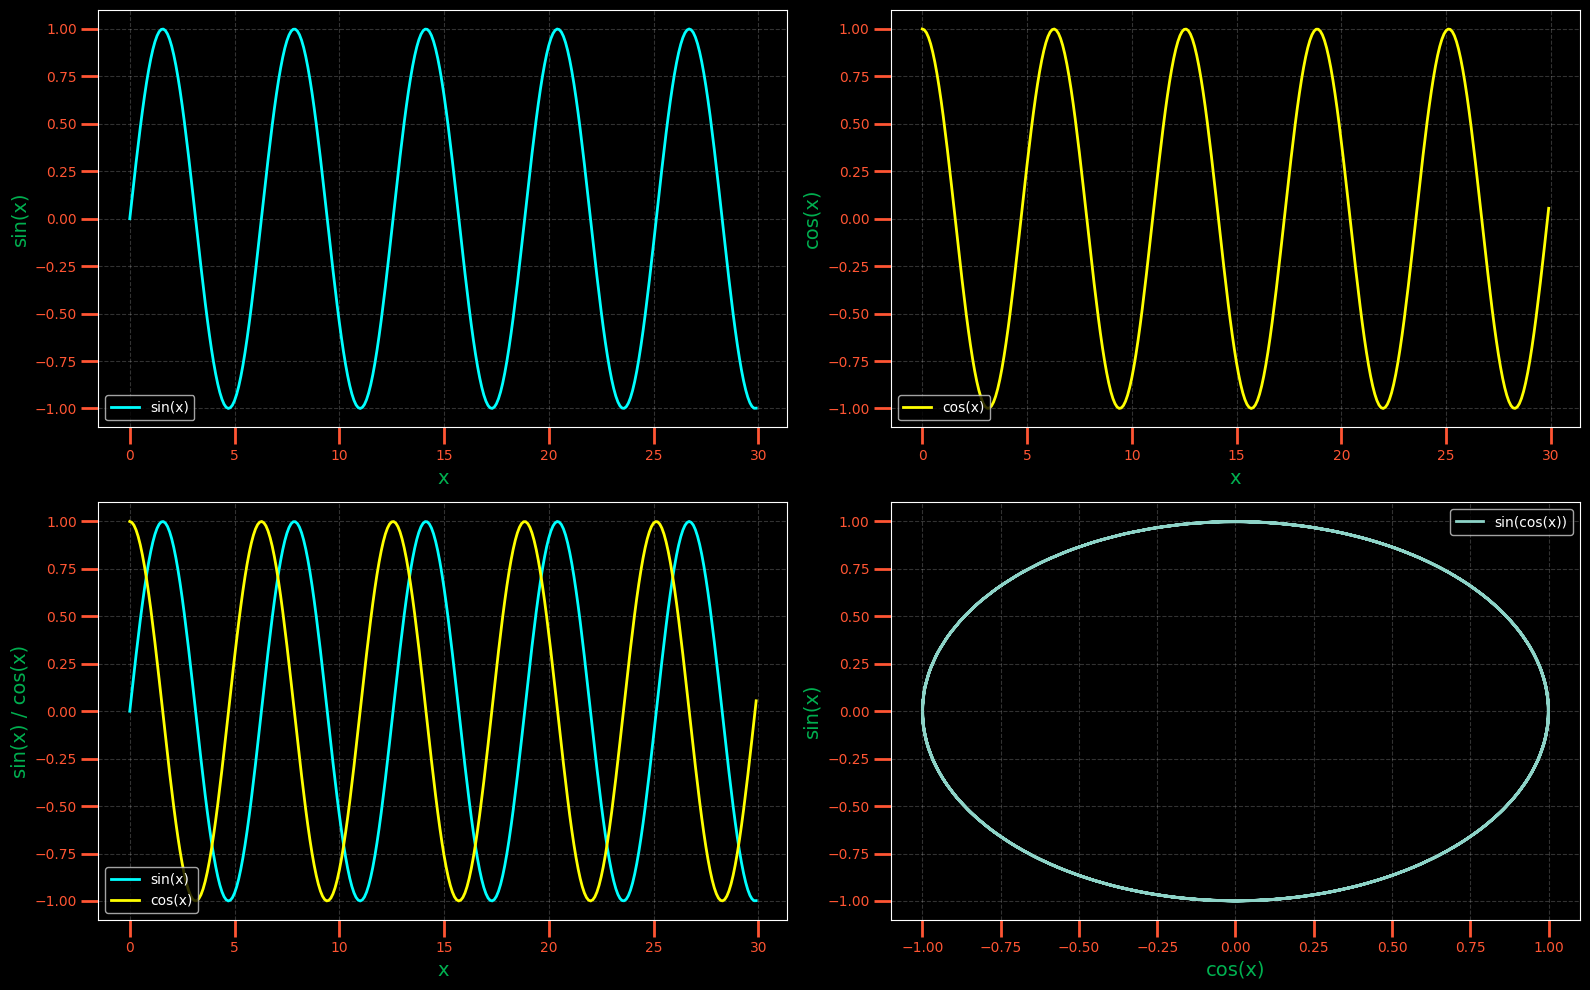

In [37]:
X = np.arange(0, 30, 0.1)
Y = np.sin(X)
Z = np.cos(X)

fig = plt.figure()
fig.set_size_inches(16, 10)

ax1 = plt.subplot(2, 2, 1)
ax1.plot(X, Y, label='sin(x)', color='cyan')

plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.grid(True, alpha=0.2, linestyle='--', color='white')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(X, Z, label='cos(x)', color='yellow')

plt.xlabel("x")
plt.ylabel("cos(x)")
plt.legend(loc='lower left')
plt.grid(True, alpha=0.2, linestyle='--', color='white')

ax3 = plt.subplot(2, 2, 3)
ax3.plot(X, Y, color='cyan', label='sin(x)')
ax3.plot(X, Z, color='yellow', label='cos(x)')

plt.xlabel("x")
plt.ylabel("sin(x) / cos(x)")
plt.legend(loc='lower left')
plt.grid(True, alpha=0.2, linestyle='--', color='white')

ax4 = plt.subplot(2, 2, 4)
ax4.plot(Y, Z, label='sin(cos(x))')

plt.xlabel("cos(x)")
plt.ylabel("sin(x)")
plt.legend()
plt.grid(True, alpha=0.2, linestyle='--', color='white')

plt.tight_layout()

plt.show()

### Переобучение и недообучение

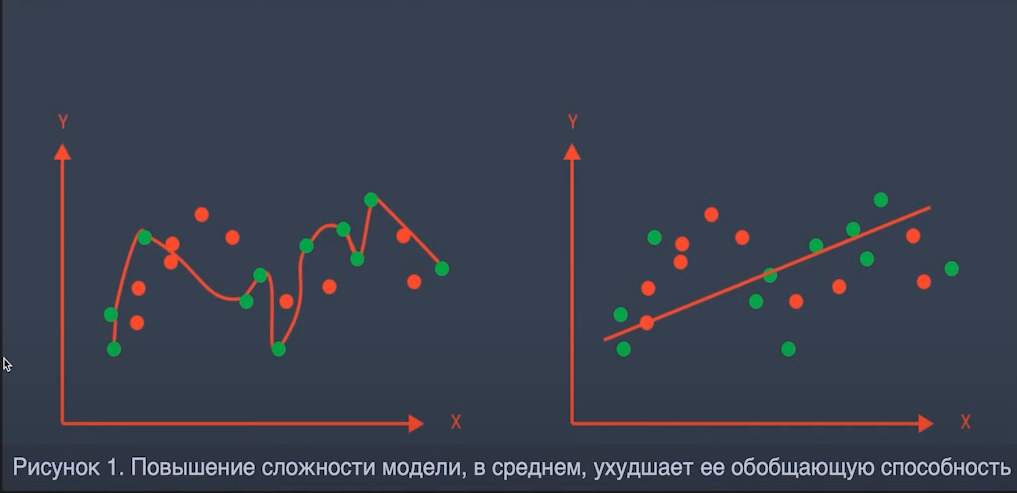

Пусть имеем 2 модели: полиномиальную и обыкновенную немодифицированную линейную без свободного коэффициента

$$
a_1(x) = \beta_1\cdot d + \beta_2 \cdot d^2 + ... + \beta_{25}\cdot d^{25} + \beta_0
$$

$$
a_2(x) = \beta_1\cdot d
$$

Давайте сгенерируем выборку $(X, Y)$ следующим образом. Скажем, что **X** - какие-то случайные числа, равномерно лежащие в отрезке $[0, 20]$. Ответы (вектор таргетов $Y$) - удвоенные **X**-ы, сгенерированные с некоторым шумом, распределенным тоже равномерно на отрезке $[-6, 6]$. 

Разделим выборку на тренировочную и тестовую (например, в пропорциях 4:1) и проверим, в каком случае модель ошибается сильнее: при сложном моделировании или простом?

In [38]:
X = np.array(sorted([20*x for x in np.random.rand(120, 1)]))
Y = np.array([2 * el + np.random.choice([-1, 1]) * 6 * np.random.rand() for el in X])

In [39]:
X_df = pd.DataFrame(X, columns=['X'])
Y_df = pd.DataFrame(Y, columns=['Y'])
df = pd.concat([X_df, Y_df], axis=1)
df.iloc[-10:]

,X,Y
110,17.775478,33.214222
111,17.813285,41.265540
112,18.325652,32.145868
113,19.076583,36.364821
114,19.168161,41.496816
115,19.398902,35.729346
116,19.450056,40.087211
117,19.470727,37.603441
118,19.484622,44.580784
119,19.791952,44.054767


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((72, 1), (48, 1), (72, 1), (48, 1))

In [41]:
# Сохраняем упорядоченные индексы наших элементов для визуализации

index_argsort = np.argsort(X_train.reshape(72,))
index_argsort

array([44, 15, 67, 35, 55, 11, 29, 64, 51, 56, 31, 53, 12,  2, 24, 70, 37,
       69, 22, 14, 42, 58, 49, 63, 18,  9, 71, 27,  1, 46, 26, 43, 47, 57,
       45, 25, 62,  0, 32,  4, 20, 52, 30, 10, 19, 16, 66, 48, 40, 68, 65,
       54, 28, 41,  7, 23, 50, 33, 38, 21, 13, 39,  5, 61,  3, 36,  8,  6,
       34, 60, 59, 17], dtype=int64)

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

C:\Users\danil\AppData\Local\Temp\ipykernel_13472\968649235.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--g" (-> color='g'). The keyword argument will take precedence.
  ax2.plot(X_train[index_argsort], model.predict(X_train[index_argsort]), '--g', linewidth=4, color='yellow')


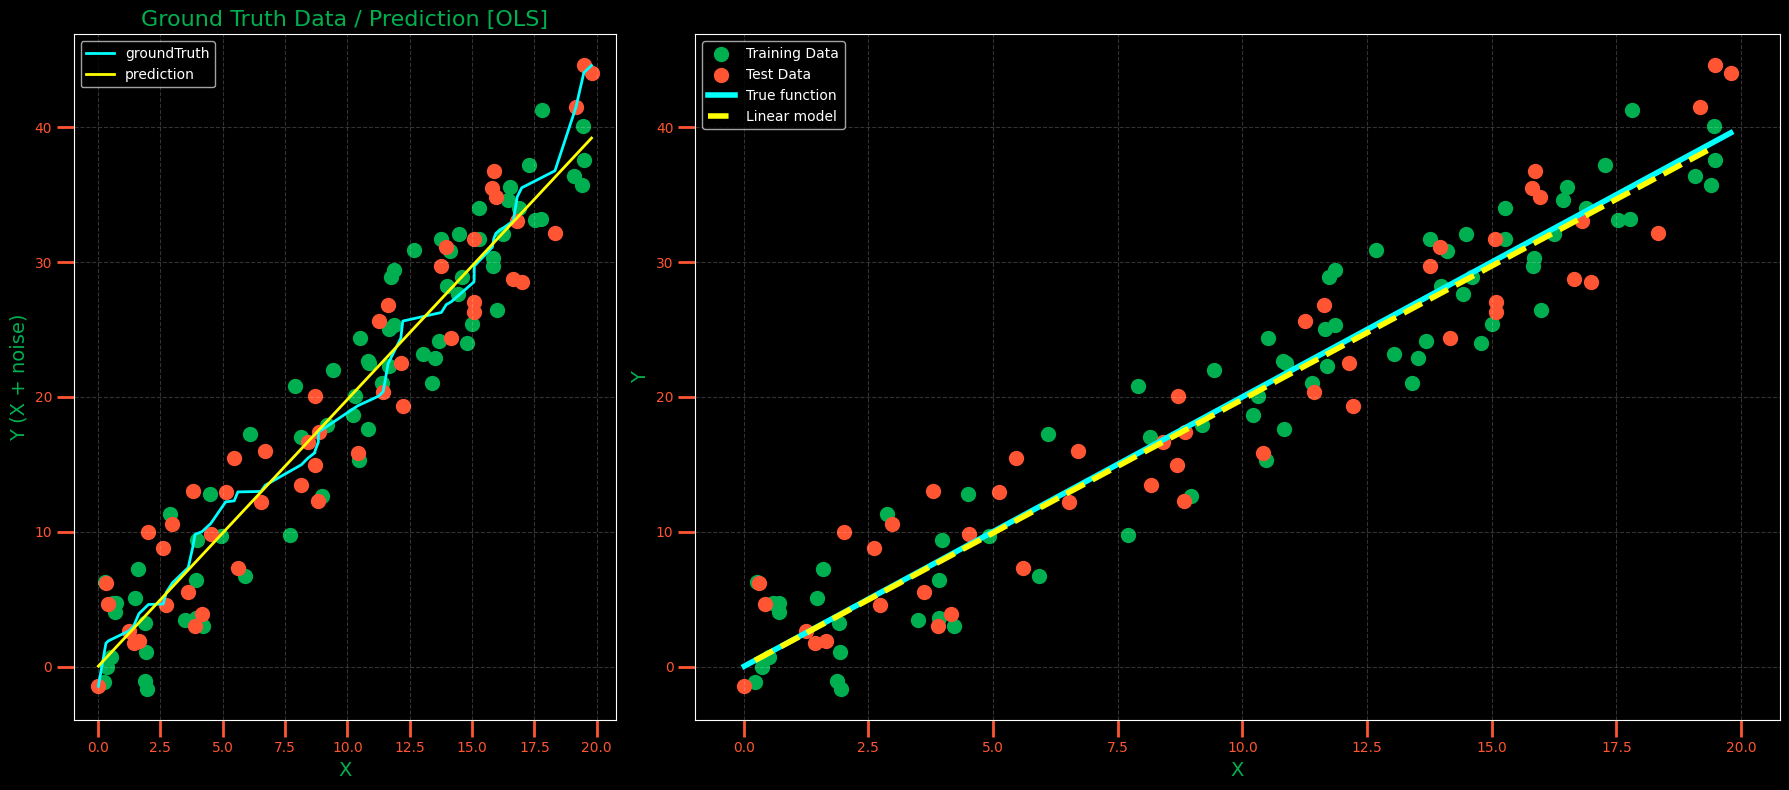

In [43]:
prediction = pd.DataFrame(model.predict(X_test), columns = ['prediction'])
groundTruth = pd.DataFrame(Y_test, columns=['groundTruth'])
answer = pd.concat([prediction, groundTruth], axis=1)
answer['X'] = pd.DataFrame(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [1, 2]})

ax1.set_title('Ground Truth Data / Prediction [OLS]')
ax1.scatter(X_train, Y_train, c='#00B050', s=100)
ax1.scatter(X_test, Y_test, c='#FF5533', s=100)
ax1.plot(sorted(answer['X']), sorted(answer['groundTruth']), label='groundTruth', color='cyan')
ax1.plot(sorted(answer['X']), sorted(answer['prediction']), label='prediction', color='yellow')
ax1.set_xlabel('X')
ax1.set_ylabel('Y (X + noise)')
ax1.legend()
ax1.grid(True, alpha=0.2, linestyle='--', color='white')

ax2.scatter(X_train, Y_train, c='#00B050', s=100)
ax2.scatter(X_test, Y_test, c='#FF5533', s=100)
ax2.plot(X, [2*x for x in X], 'cyan', linewidth=4)
ax2.plot(X_train[index_argsort], model.predict(X_train[index_argsort]), '--g', linewidth=4, color='yellow')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend(['Training Data', 'Test Data', 'True function', 'Linear model'], loc='upper left')
ax2.grid(True, alpha=0.2, linestyle='--', color='white')

plt.tight_layout()
plt.show()


In [44]:
# feature generation
X_pol = X_train.copy()

for k in range(2, 26):
    X_pol = np.append(X_pol, 
                      np.array([x**k for x in X_pol[:, 0]]).reshape(72, -1),
                      axis=1)

In [45]:
print(f"X_orig: {X_train.shape}; X_pol: {X_pol.shape}")

X_orig: (72, 1); X_pol: (72, 25)


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Создание модели, включая нормализацию с помощью StandardScaler
model_pol = make_pipeline(StandardScaler(), LinearRegression())

model_pol.fit(X_pol, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

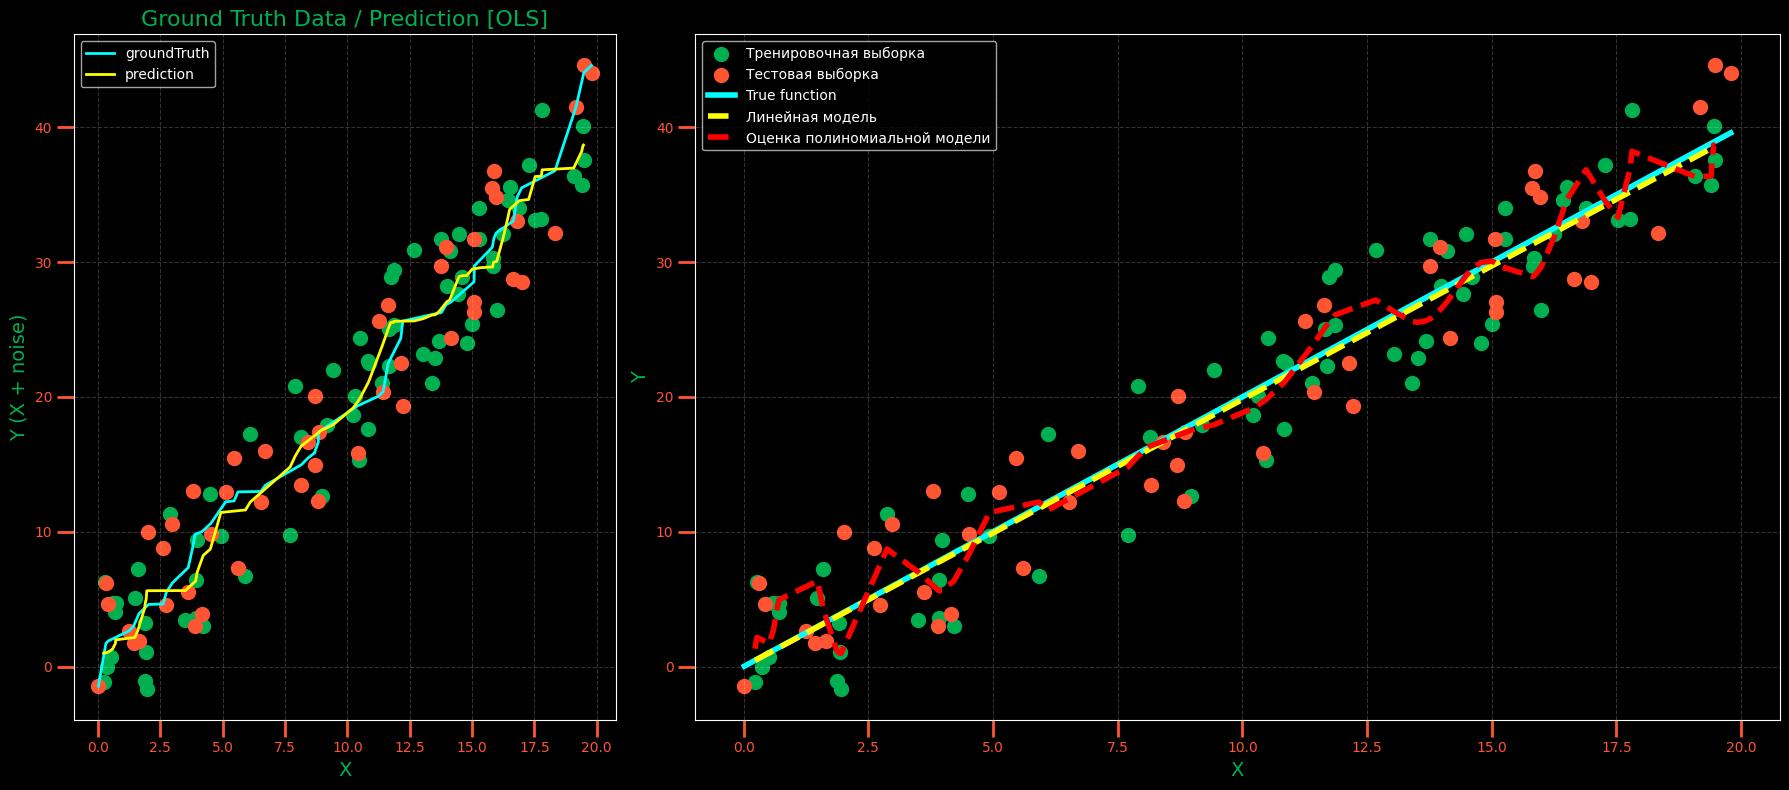

In [47]:
prediction = pd.DataFrame(model_pol.predict(X_pol), columns = ['prediction'])
groundTruth = pd.DataFrame(Y_test, columns=['groundTruth'])
answer = pd.concat([prediction, groundTruth], axis=1)
answer['X'] = pd.DataFrame(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [1, 2]})

ax1.set_title('Ground Truth Data / Prediction [OLS]')
ax1.scatter(X_train, Y_train, c='#00B050', s=100)
ax1.scatter(X_test, Y_test, c='#FF5533', s=100)
ax1.plot(sorted(answer['X']), sorted(answer['groundTruth']), label='groundTruth', color='cyan')
ax1.plot(X_train[index_argsort], sorted(answer['prediction']), label='prediction', color='yellow')
ax1.set_xlabel('X')
ax1.set_ylabel('Y (X + noise)')
ax1.legend()
ax1.grid(True, alpha=0.2, linestyle='--', color='white')

ax2.scatter(X_train, Y_train, c='#00B050', s=100)
ax2.scatter(X_test, Y_test, c='#FF5533', s=100)
ax2.plot(X, [2*x for x in X], 'cyan', linewidth=4)
ax2.plot(X_train[index_argsort], 
         model.predict(X_train[index_argsort]),
         '--', linewidth=4, color='yellow')
ax2.plot(X_train[index_argsort], 
         model_pol.predict(X_pol[index_argsort]),
         '--r', linewidth=4)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель', 'Оценка полиномиальной модели'], 
            loc = 'upper left')
ax2.grid(True, alpha=0.2, linestyle='--', color='white')

plt.tight_layout()
plt.show()

In [48]:
np.mean((model.predict(X_train) - Y_train)**2)

11.79663197466622

In [49]:
np.mean((model.predict(X_test) - Y_test)**2)

12.948398351228287

In [50]:
np.mean((model_pol.predict(X_pol) - Y_train)**2)

8.869753621076184

In [51]:
X_pol_test = X_test.copy()

for k in range(2, 26):
    X_pol_test = np.append(X_pol_test, np.array([x**k for x in X_pol_test[:, 0]]).reshape(48, -1), axis=1)


np.mean((model_pol.predict(X_pol_test) - Y_test)**2)

5678.381747248743

### Продолжаем решать проблему с переобученной полиномиальной задачей из 5 урока.
### Для этого применим навыки регуляризации и масштабирования параметров.

In [52]:
X_pol

array([[1.16677186e+01, 1.36135658e+02, 1.58839255e+03, ...,
        3.47277608e+24, 4.05193741e+25, 4.72768655e+26],
       [9.43103558e+00, 8.89444321e+01, 8.38838104e+02, ...,
        2.59935632e+22, 2.45146219e+23, 2.31198272e+24],
       [2.87460513e+00, 8.26335463e+00, 2.37538816e+01, ...,
        3.52613146e+10, 1.01362356e+11, 2.91376747e+11],
       ...,
       [3.97885935e+00, 1.58313217e+01, 6.29906025e+01, ...,
        6.22941854e+13, 2.47859802e+14, 9.86199291e+14],
       [3.91425331e+00, 1.53213790e+01, 5.99717585e+01, ...,
        4.27489389e+13, 1.67330176e+14, 6.54972695e+14],
       [8.97190801e+00, 8.04951333e+01, 7.22194931e+02, ...,
        8.24803841e+21, 7.40006418e+22, 6.63926951e+23]])

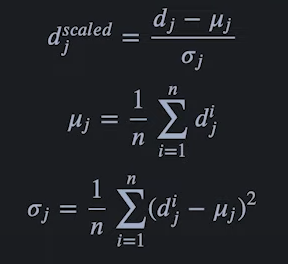

In [53]:
### Отмасштабируем данные с полиномиальными признаками

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_pol)
X_pol_transformed_train = scaler.transform(X_pol)
X_pol_transformed_test = scaler.transform(X_pol_test)


In [54]:
### Теперь обучим, допустим, Ridge (L2)

from sklearn.linear_model import Ridge

model_ridge = Ridge()

model_ridge.fit(X_pol_transformed_train, Y_train)

predictions_ridge_train = model_ridge.predict(X_pol_transformed_train)
predictions_ridge_test = model_ridge.predict(X_pol_transformed_test)

error_train = np.mean((predictions_ridge_train - Y_train) ** 2)
error_test = np.mean((predictions_ridge_test - Y_test) ** 2)


In [58]:
print(f"Качество Ridge полиномиальной регрессии на трейне: {round(error_train, 3)}\nКачество Ridge полиномиальной регрессии на тесте: {round(error_test, 3)}")

Качество Ridge полиномиальной регрессии на трейне: 11.638
Качество Ridge полиномиальной регрессии на тесте: 13.381


In [56]:
model_ridge.coef_

array([[ 8.02578671,  4.22145671,  1.24685086, -0.26710947, -0.81697243,
        -0.85230043, -0.65649853, -0.38974966, -0.13487629,  0.07101105,
         0.21644731,  0.30336367,  0.33987013,  0.33618718,  0.30249307,
         0.2478991 ,  0.18006285,  0.10514266,  0.02791912, -0.04801539,
        -0.1200523 , -0.18637425, -0.245786  , -0.29757203, -0.34137999]])